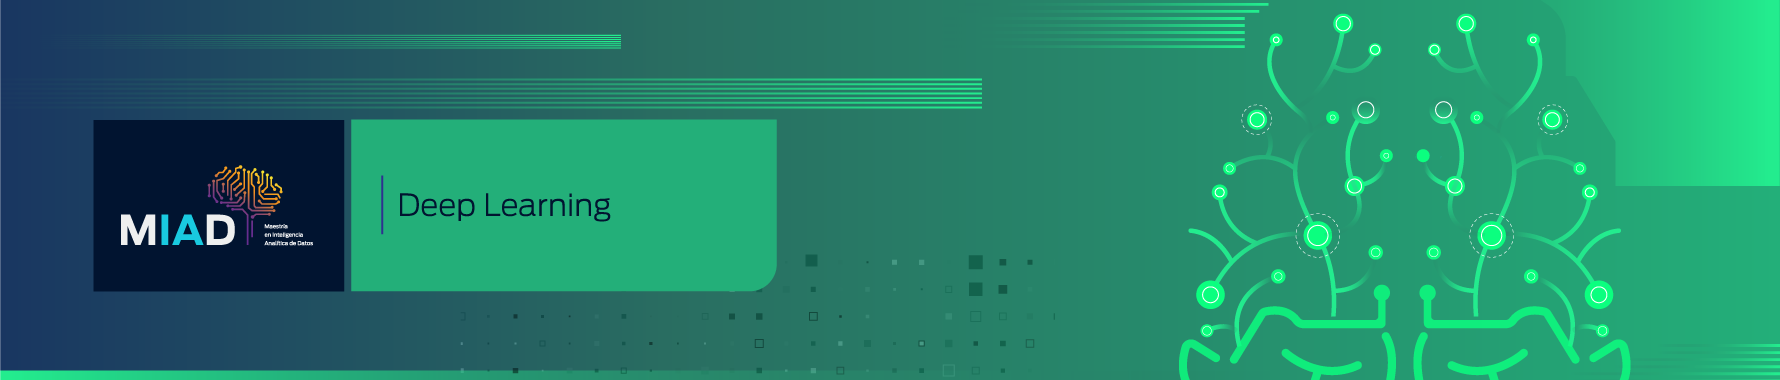

# Implementación y entrenamiento de redes neuronales
## Descenso de gradiente: Parámetros de modelo de regresión logística

### Propósito 
El propósito de este laboratorio es evidenciar una aplicación del algoritmo de descenso de gradiente. Específicamente, se implementa el algoritmo para realizar la estimación de los parámetros de un modelo de regresión logística y se introducen conceptos de cómo evaluar los modelos predictivos. Posteriormente, se propone una actividad de calificación automática en la que deben extender esta implementación para estimar los parámetros de la regresión logística con regularización tipo Ridge.

### Instrucciones generales

1. Cuando se le solicite declarar una estructura de datos debe usar el nombre exigido.

2. Utilice estrictamente los tipos de datos y nombres de variable indicadas en los enunciados de los ejercicios.

3. Evite crear, eliminar o modificar celdas de este notebook (salvo lo que se le indique) pues puede afectar el proceso de calificación automático.  

### Importar librerías de interés

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets

### Pasos para implementar manualmente el algoritmo de descenso de gradiente

1. Cargar los datos y separar muestras de train y test
2. Implementar el algoritmo para el caso particular de la función logística y su respectivo gradiente (se tienen en cuenta conocimientos del laboratorio anterior).
3. Evaluar el modelo con los datos de prueba.  


### 1. Carga de los datos
En primer lugar, cargamos la base de datos a usar en este notebook que contiene 400 observaciones y 5 columnas. "Purchased" es nuestra variable de interés y toma el valor de 1 en caso de que el usuario haya realizado la compra de un artículo particular en una tienda en línea o de 0 en caso contrario. Por su parte, nuestras variables independientes son el género, la edad y el salario estimado del usuario.

In [2]:
# Cargar los datos
df = pd.read_csv('data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



## 1.1. Separación de datos de train y test 
Luego, partimos la base de datos en una sección de train y otra de test de la siguiente manera. En este caso particular, se utilizará el 67% de los datos para entrenamiento y el 33% restante para evaluación del modelo de regresión logística a estimar:

In [3]:
# Obtener Y
YTotal=np.array(df['Purchased'])
# Unir dummies correspondientes a la variable 'Gender' al dataframe (crea dos columnas binarias 'Male' y 'Female')
merged = pd.concat([df, pd.get_dummies(df.Gender)], axis='columns')
# Obtener X
XTotal=np.array(merged[['Male','Age','EstimatedSalary']])
# Dividir muestra en train y test
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)
# Para facilitar convergencia, escalamos los datos
scaler = StandardScaler()
scaler.fit(XTrain)
XTrain=scaler.transform(XTrain)
XTest=scaler.transform(XTest)

## 2. Descenso de gradiente en  modelo de regresión logística: Implementación
Intentaremos resolver el problema de clasificación mediante un modelo de regresión logística, estimando los parámetros a través la implementación del algoritmo de descenso de gradiente. Antes de iniciar, cabe recordar que partimos de que la variable de interés $Y$ se distribuye Bernoulli con parámetro p, donde p es la probabilidad de que $Y$ sea igual a 1, que en regresión logística se modela como:

$$ p = P(Y=1) = \frac{1}{1+exp\left(-\beta^{T}X\right)} = \frac{exp\left(\beta^{T}X\right)}{1+exp\left(\beta^{T}X\right)} $$

La estimación de los parámetros $\beta^{T}=\left[b, w_{1}, ...,w_{p}\right]$ que definen el hiperplano se hace maximizando el logaritmo de la función de máxima verosimilitud de los datos:

\begin{equation} \arg \max_{\beta} \log \left(V \left(\beta \right) \right) = \arg \max_{\beta} \sum_{i=1}^{n} \log \left(p_{i}^{y_i}\left(1-p_{i}\right)^{1-y_i}\right) \end{equation} 

En este caso, para simplificar la notación hacemos $p_i = \hat Y_i$. Dada esta función objetivo (Sección 2.1), nos hace falta definir ahora su gradiente (Seccción 2.2), de modo que podamos proceder a implementar nuestro algortimo de descenso de gradiente para estimar los coeficientes. Aplicando propiedades de logaritmos:

$$ \sum_{i=1}^{n} \log\left(p_{i}^{y_i}\left(1-p_{i}\right)^{1-y_i}\right) = \sum_{i=1}^{n} \left(y_i\log\left(p_{i}\right) + \left(1-y_i\right)\log\left(1-p_{i}\right)\right) $$
$$ = \sum_{i=1}^{n} \left(y_i\log\left(p_{i}\right) + \log\left(1-p_{i}\right) - y_i\log\left(1-p_{i}\right)\right) = \sum_{i=1}^{n} \left(y_i\log\left(\frac{p_{i}}{1-p_{i}}\right) + \log\left(1-p_{i}\right)\right)$$

Es fácil demostrar que:

$$ \left(1-p\right) = \frac{1}{1+exp\left(\beta^{T}X\right)} $$

$$ \log\left(\frac{p}{1-p}\right) = \beta^{T}X $$

Por lo que, reemplazando, tenemos:

$$ \arg \max_{\beta} \sum_{i=1}^{n} \left(y_i\beta^{T}x_i  + \log\left(\frac{1}{1+exp\left(\beta^{T}x_i\right)}\right)\right) $$

Finalmente, nos queda derivar con respecto a cada parámetro, obteniendo:

$$ \frac {\partial \log \left(L \left(\beta \right) \right)}{\partial b} = \sum_{i=1}^{n} \left(y_i - p_{i}\right) $$

$$ \frac {\partial \log \left(L \left(\beta \right) \right)}{\partial w_{j}} = \sum_{i=1}^{n} \left((y_i - p_{i})x_{ij}\right) $$


### 2.1. Definición de función objetivo
Procedemos entonces a definir la función objetivo y el gradiente en código:

In [4]:
# Definir función objetivo - logaritmo de la función de verosimilitud
def fobj(B, X, Y):
    suma = 0
    X=np.append(np.ones((len(X),1)), X, axis = 1) # Añadimos columna de 1s correspondiente al intercepto
    for i in range(len(X)):
        betaTx = np.matmul(np.transpose(B), X[i]) # Beta transpuesto por X
        suma = suma + Y[i]*betaTx + np.log(1/(1+np.exp(betaTx)))
    return suma

### 2.2. Definición del gradiente de la función objetivo

In [5]:
# Definir gradiente - vector con las derivadas parciales respecto a cada estimador
def gradiente(B, X, Y):
    gradiente = np.array([])
    X=np.append(np.ones((len(X),1)), X, axis = 1) # Añadimos columna de 1s correspondiente al intercepto
    for j in range(len(B)):
        suma = 0
        for i in range(len(X)):
            betaTx = np.matmul(np.transpose(B), X[i]) # Beta transpuesto por X
            pi = np.exp(betaTx)/(1+np.exp(betaTx)) 
            suma = suma + (Y[i]-pi)*X[i][j]
        gradiente=np.append(gradiente,suma) # Añadimos la derivada parcial con respecto a \beta_j
    return gradiente

### Estimación de los parámetros mediante el algoritmo de descenso de gradiente

Habiendo definido la función objetivo y el gradiente, podemos ajustar la función de descenso de gradiente aprendida en el  laboratorio anterior para estimar los parámetros que definen el hiperplano. Debemos agregar como parámetros las observaciones tanto de X como de Y, y adicionalmente, como en este caso buscamos maximizar, debemos movernos en la dirección del gradiente. Lo anterior, implica que al actualizar la solución debemos sumar el producto entre el paso y el gradiente, en lugar de restar.

In [6]:
# Función de descenso de gradiente
def regresion_logistica(fun_obj, gradiente, sol_inicial, step, tolerancia, X, Y):
    # Cargar solución inicial
    solucion = sol_inicial
    # Definir variable booleana para validar si se cumplió el criterio de parada
    stop = False
    # Definir contador de iteraciones
    num_iter = 1
    while stop==False:
        # Evaluar gradiente
        gradiente_eval = gradiente(solucion, X, Y)
        # Actualizar la solucion (se suma al tratarse de maximización)
        solucion = solucion + step * gradiente_eval
        # Evaluar la solucion
        solucion_eval = fun_obj(solucion, X, Y)
        # Actualizar contador de iteraciones
        num_iter += 1
        # Validar si se cumplió el criterio de parada, es decir, si la norma del gradiente evaluado en la solución actual es menor a la tolerancia dada
        if (np.linalg.norm(gradiente_eval) < tolerancia):
            stop = True
    print("Luego de "+str(num_iter)+" iteraciones, se encontró que los estimadores del modelo de regresión logística son "+str(solucion))         
    return solucion

### 2.3. Definición de parámetros inciales
En este caso, definimos un tamaño de paso de 0.001, una tolerancia de 0.001 e inicializamos los estimadores en 0. Como estamos entrenando nuestro modelo, solo hacemos uso del set de train definido previamente.

In [7]:
# Definir solución inicial - estimadores en 0 - tenemos uno para cada variable independiente más el intercepto
sol_inicial = np.zeros(len(XTrain[1])+1)
# Definir tamaño de paso
step = 0.001
# Definir tolerancia
tolerancia = 0.001

# Llamar la función descenso de gradiente - tarda un poco
estimadores = regresion_logistica(fobj, gradiente, sol_inicial, step, tolerancia, XTrain, yTrain)

Luego de 1096 iteraciones, se encontró que los estimadores del modelo de regresión logística son [-1.12367173  0.08219539  2.26027701  1.09782114]


## 3. Evaluación del modelo
Se procede ahora a evaluar el modelo realizando las predicciones para las observaciones del set de prueba y calculando diversas métricas de desempeño de modelos de clasificación.

El accuracy del modelo es: 0.8863636363636364
La precisión del modelo es: 0.8666666666666667
La matriz de confusión es: [[78  6]
 [ 9 39]]
El AUC del modelo es: 0.9494047619047619


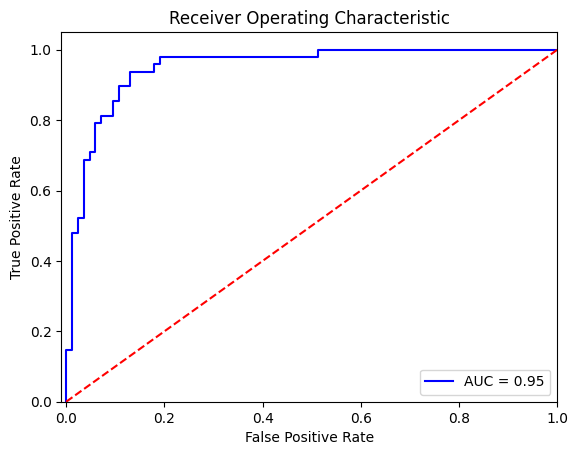

In [8]:
# Añadir la columna correspondiente al intercepto
XTest_int=np.append(np.ones((len(XTest),1)), XTest, axis = 1)
# Hallar las probabilidades estimadas dados los coeficientes calculados
predicciones_prob = [1/(1+np.exp(-np.matmul(np.transpose(estimadores),XTest_int[i]))) for i in range(len(XTest_int))]
# Hallar la clase que predice nuestro modelo, usando un threshold de 0.5
y_pred = [1 if predicciones_prob[i] >= 0.5 else 0 for i in range(len(predicciones_prob))]

# Imprimir métricas de desempeño y 
print("El accuracy del modelo es: "+str(accuracy_score(y_true=yTest, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=yTest, y_pred=y_pred)))
print("La matriz de confusión es: "+str(confusion_matrix(y_true=yTest, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(yTest, predicciones_prob, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### (Opcional) Comparación con la función de scikit learn
Ahora, con el fin de evaluar nuestro algoritmo para estimar los parámetros del modelo logístico hecho a pedal con una librería reconocida que cumple esta misma función, procedemos a comparar los coeficientes obtenidos con aquellos estimados mediante la función _LogisticRegression( )_ de la librería scikit learn. Evidenciamos que, si bien existe diferencia entre las dos soluciones, esta es relativamente pequeña. Ahora, al hallar el logaritmo de la función de máxima verosimilitud, observamos que, de hecho, con la solución obtenida por medio de descenso de gradiente se consigue un mayor valor en la función objetivo en este caso.

In [9]:
# Estimamos los coeficientes mediante la librería
clf=LogisticRegression(random_state=0).fit(XTrain, yTrain)
estimadores_sklearn = np.append(clf.intercept_,clf.coef_)
# Imprimimos resultados
print("Los estimadores con la librería scikit learn son: "+str(estimadores_sklearn))
print("Los estimadores con el algoritmo de descenso de gradiente son: "+str(estimadores))
print("La magnitud de la diferencia absoluta entre ambas soluciones es: "+str(np.linalg.norm(estimadores_sklearn-estimadores)))
print("La función objetivo evaluada en la solución obtenida con la librería es: "+str(fobj(estimadores_sklearn,XTrain,yTrain)))
print("La función objetivo evaluada en la solución obtenida con el algortimo de descenso de gradiente es: "+str(fobj(estimadores,XTrain,yTrain)))

Los estimadores con la librería scikit learn son: [-1.0612704   0.06174098  2.05737072  0.99879068]
Los estimadores con el algoritmo de descenso de gradiente son: [-1.12367173  0.08219539  2.26027701  1.09782114]
La magnitud de la diferencia absoluta entre ambas soluciones es: 0.2351389030821242
La función objetivo evaluada en la solución obtenida con la librería es: -98.96797523292818
La función objetivo evaluada en la solución obtenida con el algortimo de descenso de gradiente es: -98.71734317210283


Pese a las diferencias obtenidas, la predicción obtenida sobre la muestra de prueba y, por ende, el desempeño terminan siendo los mismos en ambos modelos.

El AUC del modelo estimado por librería es: 0.9494047619047619


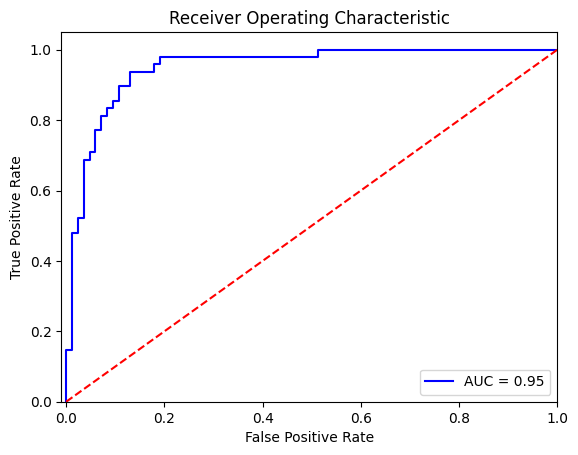

In [10]:
prediccionesRegLog=clf.predict(XTest)
prediccionesProbRegLog=clf.predict_proba(XTest)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbRegLog[:,1], pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo estimado por librería es: "+str(AUCRegLog))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Actividad calificada individual: Estimación de regresión logística con regularización Ridge mediante el algortimo de descenso de gradiente

En los modelos de regresión logística, es posible implementar métodos de regularización para encontrar un balance entre el sesgo y la varianza. Lo anterior, consiste en introducir una penalización en la función objetivo. Para el caso de penalización Ridge (norma 2) en regresión logística, el problema de optimización quedaría como: 

$$ \arg \max_{\beta} \sum_{i=1}^{n} \left(y_i\beta^{T}x_i  + \log\left(\frac{1}{1+exp\left(\beta^{T}x_i\right)}\right)\right) - \lambda \sum_{j=0}^{k} \beta_{j}^{2}$$

En esta actividad autocalificada por _nbgrader,_ usted deberá definir la función objetivo y el gradiente, así como modificar la función de descenso de gradiente de modo que, dado un valor de penalización $\lambda$, se puedan estimar los coeficientes del modelo de regresión logística con regularización Ridge:

In [ ]:
#Ingrese su código acá reemplazando la línea "raise NotImplementedError"
# your code here
def regresion_logistica_ridge():
    f=1

Las siguientes pruebas (tests) le permitirán evaluar su código y validar si los resultados son los esperados. *NOTA: Este laboratorio posee pruebas ocultas con las cuales se realizan verificaciones adicionales a su código. Dichas pruebas afectarán su nota, por lo tanto debe asegurarse que el razonamiento de sus algoritmos sea el correcto.* 

In [ ]:
# Test
sol_inicial = np.zeros(len(XTrain[1])+1)+0.05
step = 0.001
tolerancia = 0.01
pen = 0.05

# Llamar la función descenso de gradiente - tarda un poco
estimadores = regresion_logistica_ridge(fobj, gradiente, sol_inicial, step, tolerancia, XTrain, yTrain, pen)

assert len(estimadores) == 4
assert round(estimadores[0],3)==round(-1.1114972733544244,3)
assert round(estimadores[3],3)==round(1.0843391028556706,3)
